<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body style="font-family: Arial, sans-serif; background-color: #000000; color: #ffffff; line-height: 1.6; padding: 20px;">

  <h1 style="color: #ffcc00; font-size: 2.8em; text-align: center; padding-bottom: 20px;">
    All You Need Is High-Quality Datasets
  </h1>

  <div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
    <p style="font-size: 1.2em; color: #f0f0f0;">
      In the world of <strong>Large Language Models (LLMs)</strong>, many experts have traditionally emphasized the importance of hyperparameters and specific model architectures, like transformers. However, recent studies reveal that the most important factor for improving LLM performance is not necessarily the fine-tuning of these parameters but rather the <strong>quality of the dataset</strong> used for training.
    </p>
  </div>

  <h2 style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    Data Over Hyperparameters
  </h2>

  <div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
<p style="font-size: 1.2em; color: #f0f0f0;">
  Studies, such as those conducted by OpenAI and Microsoft, demonstrate that <strong>high-quality data</strong> is the driving force behind the capabilities of modern LLMs. For instance, OpenAI's <strong>GPT-4</strong> achieved significant breakthroughs not merely through architectural innovations, but by being trained on a vast, meticulously curated dataset that enabled it to excel in various domains such as law, mathematics, and coding <a href="https://www.microsoft.com/en-us/research/publication/sparks-of-artificial-general-intelligence-early-experiments-with-gpt-4/" style="color: #ffcc00;">[Microsoft, 2023]</a>. Furthermore, Microsoft's <strong>Phi-3 model</strong> demonstrated that, even with fewer parameters, leveraging a high-quality, filtered dataset allowed it to rival larger models by focusing on knowledge and reasoning instead of noisy web data <a href="https://research.microsoft.com/en-us/publication/phi-3/" style="color: #ffcc00;">[Microsoft Research, 2023]</a>.
</p>

<p style="font-size: 1.2em; color: #f0f0f0;">
      Even older architectures like <strong>MiniGRU</strong>—an architecture that precedes transformers—have shown that with the right datasets, they can rival or even outperform transformer-based models in certain tasks <a href="https://arxiv.org/abs/2410.01201v1#:~:text=The%20scalability%20limitations%20of" style="color: #ffcc00;">[MiniGRU Study, 2023]</a>. This underscores a vital principle: the <strong>quality and distribution</strong> of data far outweigh the marginal gains from hyperparameter adjustments.
    </p>
  </div>

 <h2 style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    Democratizing AI with High-Quality Datasets
</h2>

<div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
  <p style="font-size: 1.2em; color: #f0f0f0;">
    In this notebook, we aim to <strong>democratize AI</strong> by providing the resources necessary for individuals and organizations to create their own high-quality datasets in their respective languages. By focusing on dataset quality rather than hyperparameter tweaking, we can enable more diverse communities to develop efficient and powerful models. The resources shared here will help you <strong>build your own datasets</strong> and ensure they meet the standards needed to train top-tier LLMs, regardless of the architecture or model size being used.
  </p>
</div>

<div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
  <p style="font-size: 1.2em; color: #f0f0f0;">
    <strong>Conclusion</strong>: While hyperparameters and model architectures matter, recent research confirms that nothing matters more than having <strong>precisely curated datasets</strong>. By improving the <strong>quality</strong> and <strong>distribution</strong> of data, we can achieve better results with existing architectures, whether it's transformers, RNNs, or even older models like MiniGRU.
  </p>
</div>


# Let's ask Gemma what she thinks...

In [ ]:
!pip install -qqqU accelerate bitsandbytes markdown2

from transformers import AutoModelForCausalLM, AutoTokenizer, TextStreamer, BitsAndBytesConfig
import torch

tokenizer_9b = AutoTokenizer.from_pretrained("/kaggle/input/gemma-2/transformers/gemma-2-9b-it/2/")
model_9b = AutoModelForCausalLM.from_pretrained(
    "/kaggle/input/gemma-2/transformers/gemma-2-9b-it/2/",
    load_in_4bit=True,
    device_map="auto",
    torch_dtype=torch.bfloat16
)

prompt = f"""I would like some tips and advice so that my LLM training datasets are of high quality and have a good distribution."""

chat = [{"role": "user", "content": f"{prompt}"}]
chat = tokenizer_9b.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)
inputs = tokenizer_9b(chat, return_tensors="pt").to('cuda')
streamer = TextStreamer(tokenizer_9b, skip_prompt=True)

_ = model_9b.generate(**inputs, streamer=streamer, max_new_tokens=2024, do_sample=True, temperature=0.3, top_p=0.9)

## A nice function to convert gemma's output from markdown to html. (gemma likes to reply in markdown, this means she learned from markdown, this means she follows markdown prompts very well)

In [ ]:
import markdown2
from IPython.display import display, HTML, clear_output
import time

class SimpleMarkdownStreamer(TextStreamer):
    def __init__(self, tokenizer):
        super().__init__(tokenizer, skip_prompt=True)
        self.generated_text = ""
        self.output = display(HTML(""), display_id=True)

    def on_finalized_text(self, text: str, stream_end: bool = False):
        self.generated_text += text
        html = markdown2.markdown(self.generated_text)
        styled_html = f"""
        <style>
            .markdown-body {{
                font-family: Arial, sans-serif;
                line-height: 1.6;
                padding: 20px;
                max-width: 800px;
                margin: auto;
            }}
            .markdown-body h1 {{
                border-bottom: 1px solid #eaecef;
                padding-bottom: 0.3em;
            }}
            .markdown-body code {{
                background-color: #f6f8fa;
                border-radius: 3px;
                font-size: 85%;
                margin: 0;
                padding: 0.2em 0.4em;
            }}
        </style>
        <div class="markdown-body">
        {html}
        </div>
        """
        self.output.update(HTML(styled_html))

# Use

prompt = f"""I would like some tips and advice so that my LLM training datasets are of high quality and have a good distribution."""

chat = [{"role": "user", "content": f"{prompt}"}]
chat = tokenizer_9b.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)

inputs = tokenizer_9b(chat, return_tensors="pt").to('cuda')
streamer = SimpleMarkdownStreamer(tokenizer_9b)
outputs = model_9b.generate(**inputs, streamer=streamer, max_new_tokens=2024, do_sample=True, temperature=0.3, top_p=0.9)

<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body style="font-family: Arial, sans-serif; background-color: #000000; color: #ffffff; line-height: 1.6; padding: 20px;">

  <h1 style="color: #ffcc00; font-size: 2.8em; text-align: center; padding-bottom: 20px;">
    Adapting Large Language Models to a Reference Language
  </h1>

  <div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
    <p style="font-size: 1.2em; color: #f0f0f0;">
      Recent research in the field of <strong>Large Language Models (LLMs)</strong> has shown that adapting a model to a specific language or domain requires more than just hyperparameter tuning or fine-tuning existing models. There are structured stages, and the most effective method involves a combination of <strong>Continued Pretraining</strong>, <strong>Instruction Fine-Tuning</strong>, and <strong>Direct Preference Optimization (DPO)</strong>. Each step is designed to improve the model’s understanding of the target language and its ability to perform specific tasks within that language or domain.
    </p>
  </div>

  <h2 style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    Stage 1: Continued Pretraining
  </h2>

  <div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
    <p style="font-size: 1.2em; color: #f0f0f0;">
      <strong>Continued Pretraining</strong> is one of the most important initial steps for adapting a language model. This involves taking a base model that has already been pre-trained on a large general corpus (such as <strong>GPT</strong> or <strong>T5</strong>) and continuing the pretraining process with a <strong>domain-specific</strong> or <strong>language-specific</strong> dataset.
      <br><br>
      Research has shown that <strong>domain-adaptive pretraining (DAP)</strong> can significantly improve performance on specific tasks when the model is trained on highly relevant data. In the context of languages, pretraining on a specific language corpus helps the model better understand the grammatical structures, idiomatic expressions, and context-specific terms unique to that language <a href="https://arxiv.org/abs/2004.10964" style="color: #ffcc00;">[Gururangan et al., 2020]</a>.
    </p>
    <a href="https://huggingface.co/datasets/wikimedia/wikipedia" style="color: #ffcc00;">[Multilingual Wikipedia dataset]</a>
  </div>

</body>
</html>


# Start point!

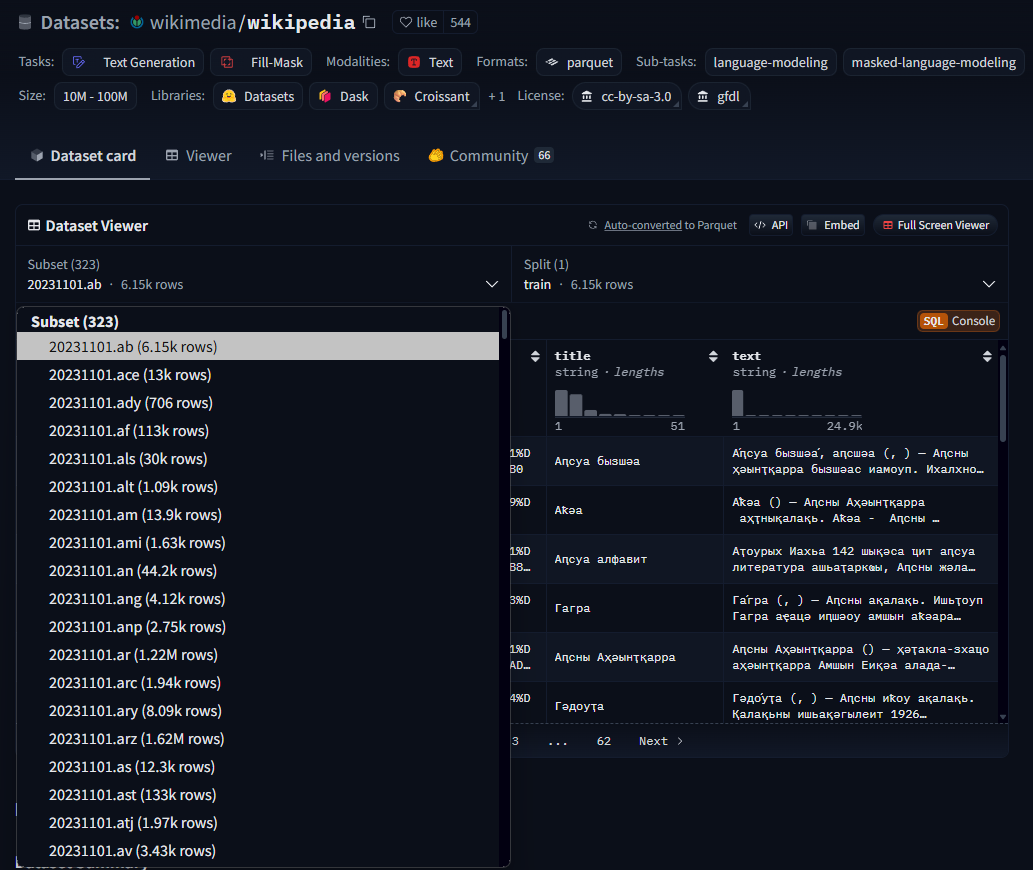

# Find your language

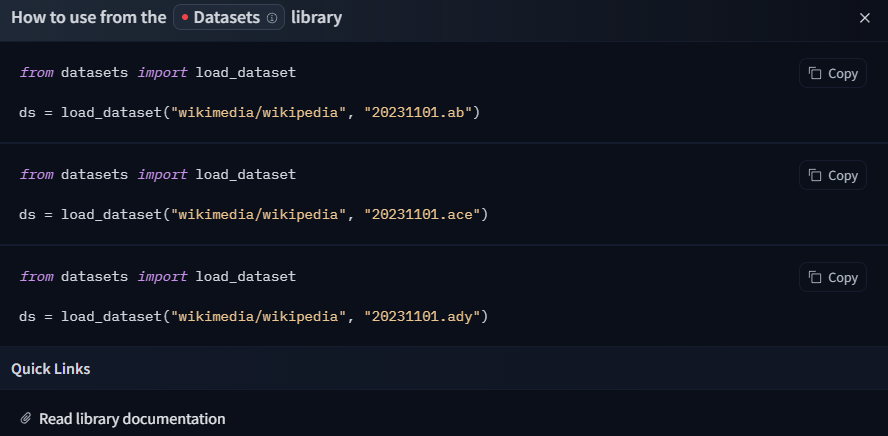

# Download

In [ ]:
from datasets import load_dataset

ds = load_dataset("wikimedia/wikipedia", "20231101.es")

In [ ]:
import random

train_data = ds['train']
if len(train_data) >= 5000:
    random_indices = random.sample(range(len(train_data)), 5000)
    sampled_data = train_data.select(random_indices)
else:
    print(f"El dataset solo tiene {len(train_data)} ejemplos. Se usarán todos.")
    sampled_data = train_data

first_example = sampled_data['text'][0]
print("Primeros 100 caracteres del primer ejemplo:\n" )
print(first_example[:2500] + "...")

<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body style="font-family: Arial, sans-serif; background-color: #000000; color: #ffffff; line-height: 1.6; padding: 20px;">

  <h2 style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    Continued Pretraining with LoRA for Low-Resource GPUs
  </h2>

  <div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
    <p style="font-size: 1.2em; color: #f0f0f0;">
      <strong>Continued Pretraining</strong> allows a model to adapt better to specific domains or languages, especially when working with low-resource environments. However, training <strong>all parameters</strong> of a large language model (LLM) can be computationally expensive, particularly on <strong>low-resource GPUs</strong>. To address this, we use <strong>LoRA</strong> (Low-Rank Adaptation), which makes training more memory-efficient while still fine-tuning a significant number of parameters.
    </p>
  </div>

  <h2 style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    Optimizing LoRA for Pretraining
  </h2>

  <div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
    <p style="font-size: 1.2em; color: #f0f0f0;">
      LoRA works by decomposing large weight matrices into smaller ones, enabling updates to a reduced number of parameters. This is particularly helpful for memory-constrained environments where training the full model isn't feasible. Below are some critical optimizations to consider when using LoRA for pretraining:
    </p>
    <ul style="font-size: 1.2em; color: #f0f0f0;">
      <li>
        <strong>High LoRA Rank and Alpha Values</strong>: 
        <br>
        A <strong>higher LoRA rank</strong> means more detailed weight updates, which is essential during pretraining to capture key changes in model weights. By adjusting the <strong>rank</strong> and <strong>alpha</strong> settings, you ensure more robust adaptation. However, keep in mind that higher values will increase memory consumption, so they must be carefully controlled to prevent overloading your hardware.
      </li>
      <li>
        <strong>Gradient Control</strong>: 
        <br>
        It’s crucial to manage gradient norms to avoid issues like <strong>exploding gradients</strong>. Using techniques like <strong>gradient clipping</strong> ensures that training remains stable, even with higher LoRA ranks. Also, implementing a <strong>cosine learning rate schedule</strong> can help gradually reduce the learning rate, ensuring smooth convergence.
      </li>
    </ul>
  </div>

  <h2 style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    Benefits of LoRA in Memory-Constrained Training
  </h2>

  <div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
    <p style="font-size: 1.2em; color: #f0f0f0;">
      LoRA allows the model to make adjustments without requiring large amounts of memory, which is crucial for GPU-limited environments. For instance, while a standard model might use full matrices to store weight updates, LoRA reduces these matrices to lower ranks, making training more efficient without compromising too much on precision. This is a practical approach for <strong>low-resource hardware</strong> where memory is at a premium.
    </p>
  </div>

  <h2 style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    Next Steps for RLHF and Fine-Tuning
  </h2>

  <div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
    <p style="font-size: 1.2em; color: #f0f0f0;">
      After completing <strong>continued pretraining</strong> with LoRA, you can further fine-tune the model with <strong>Reinforcement Learning with Human Feedback (RLHF)</strong>. LoRA can continue to be applied during RLHF, fine-tuning specific layers and allowing for further memory savings. However, for certain critical tasks, you may choose to gradually <strong>unfreeze more layers</strong> or fine-tune specific parameters of the model to achieve more specialized performance.
    </p>
  </div>

</body>
</html>


<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Generating Question-Answer Pairs for RLHF</title>
</head>
<body style="font-family: Arial, sans-serif; background-color: #000000; color: #ffffff; line-height: 1.6; padding: 20px;">

  <h1 style="color: #ffcc00; font-size: 2.8em; text-align: center; padding-bottom: 20px;">
    Generating Question-Answer Pairs for RLHF
  </h1>

  <div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
    <p style="font-size: 1.2em; color: #f0f0f0;">
      This Python code is designed to generate <strong>Question-Answer (Q&A)</strong> pairs from a given text dataset using a large language model (LLM). The goal is to automatically create high-quality datasets for use in <strong>Reinforcement Learning with Human Feedback (RLHF)</strong>. By providing a passage of text as input, the model generates relevant questions and their corresponding detailed answers. This allows for large-scale, automated creation of Q&A pairs which can then be used to fine-tune or train LLMs in various tasks.
    </p>
  </div>

  <h2 style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    Explanation of the Code
  </h2>

  <div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
    <p style="font-size: 1.2em; color: #f0f0f0;">
      The function <strong>generar_pregunta_respuesta(texto_ejemplo)</strong> takes a text example as input and creates a prompt asking the LLM to generate a question and an answer based on the provided content. 
      <br><br>
      The prompt is structured to ensure that the question is relevant and the answer is comprehensive, making the generated data useful for RLHF purposes.
    </p>
    <p style="font-size: 1.2em; color: #f0f0f0;">
      The function tokenizes the prompt using the <strong>tokenizer_9b</strong> and passes it to the <strong>model_9b</strong> for generating a response. The model's output is processed and returned as the final question-answer pair.
    </p>
    <pre style="background-color: #222; padding: 10px; border-radius: 5px; overflow-x: auto; color: #f0f0f0;">
def generar_pregunta_respuesta(texto_ejemplo):
    prompt = f"""
    Por favor, genera una pregunta y su correspondiente respuesta basadas en el siguiente texto...
    """
    chat = [{"role": "user", "content": prompt}]
    inputs = tokenizer_9b(chat, return_tensors="pt", max_length=8096).to('cuda')
    outputs = model_9b.generate(... max_length=8096)
    return tokenizer_9b.decode(outputs[0], skip_special_tokens=True)
    </pre>
  </div>

  <h2 style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    Processing Multiple Dataset Examples
  </h2>

  <div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
    <p style="font-size: 1.2em; color: #f0f0f0;">
      The <strong>procesar_ejemplo(index)</strong> function processes individual text entries from the dataset. It takes an <strong>index</strong> as input, retrieves the corresponding text, and calls the question-answer generation function. It ensures that the dataset index is valid, and prints the original text and the generated question-answer pair.
    </p>
    <pre style="background-color: #222; padding: 10px; border-radius: 5px; overflow-x: auto; color: #f0f0f0;">
def procesar_ejemplo(index):
    if 0 <= index < len(sampled_data):
        ejemplo = sampled_data['text'][index]
        resultado = generar_pregunta_respuesta(ejemplo)
    </pre>
  </div>

  <h2 style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    Summary
  </h2>

  <p style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    This method leverages an LLM to automatically create <strong>Q&A pairs</strong> from textual data. The generated datasets can be used for training models in RLHF by evaluating the quality of the responses and fine-tuning the model to align with human-like preferences. In this example, it shows how to process a small batch of text examples to generate structured question-answer pairs.
  </p>

</body>
</html>


In [ ]:
def generar_pregunta_respuesta(texto_ejemplo):
    prompt = f"""
    Por favor, genera una pregunta y su correspondiente respuesta basadas en el siguiente texto. La pregunta debe ser relevante y general al contenido del texto, y la respuesta debe ser completa y precisa.

    Texto de ejemplo:
    {texto_ejemplo}

    Formato de salida:
    Pregunta: [La pregunta generada]
    Respuesta: [La respuesta generada]
    
    # Es muy importante que las respuestas sean lo mas largas y educativas posibles.
    Asegúrate de que la pregunta y la respuesta estén directamente relacionadas con la información proporcionada en el texto de ejemplo y que la respuesta ademas de responder la pregunta incluya datos relevantes del texto.
    """

    chat = [{"role": "user", "content": prompt}]
    chat = tokenizer_9b.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)
    
    inputs = tokenizer_9b(chat, return_tensors="pt", max_length=8096).to('cuda')
    
    streamer = SimpleMarkdownStreamer(tokenizer_9b)
    
    outputs = model_9b.generate(
        **inputs, 
        streamer=streamer, 
        do_sample=True, 
        temperature=0.1, 
        top_p=0.9,
        max_length=8096
    )

    return tokenizer_9b.decode(outputs[0], skip_special_tokens=True)

# Función para procesar un ejemplo del dataset
def procesar_ejemplo(index):
    if 0 <= index < len(sampled_data):
        ejemplo = sampled_data['text'][index]  # Asume que la columna se llama 'text'
        print(f"Procesando ejemplo {index}:")
        print("Texto original (primeros 100 caracteres):")
        print(ejemplo[:500])
        print("\nGenerando pregunta y respuesta:")
        resultado = generar_pregunta_respuesta(ejemplo)
    else:
        print(f"Índice {index} fuera de rango. El dataset tiene {len(sampled_data)} ejemplos.")

# Ejemplo de uso: procesar los primeros 5 ejemplos
for i in range(5):
    procesar_ejemplo(i)
    print("\n" + "="*50 + "\n")

<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body style="font-family: Arial, sans-serif; background-color: #000000; color: #ffffff; line-height: 1.6; padding: 20px;">

  <h2 style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    Stage 2: Instruction Fine-Tuning
  </h2>

  <div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
    <p style="font-size: 1.2em; color: #f0f0f0;">
      <strong>Instruction Fine-Tuning</strong> is the second critical step in the process. Here, the model is fine-tuned on datasets that involve <strong>instructional prompts</strong> and <strong>task-specific data</strong>. This helps the model learn how to follow user instructions accurately, which is essential for tasks like translation, summarization, and question-answering in the reference language.
      <br><br>
      Instruction tuning has been a key factor in models like <strong>T5</strong> and <strong>GPT-3</strong>, which excel at understanding and executing tasks given in natural language prompts <a href="https://arxiv.org/abs/1910.10683" style="color: #ffcc00;">[Raffel et al., 2020]</a>.
    </p>
  </div>

  <h2 style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    Multilingual Datasets on Hugging Face
  </h2>

  <div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
    <p style="font-size: 1.2em; color: #f0f0f0;">
      Hugging Face offers a vast collection of datasets across multiple languages, including many not specifically cataloged by language, which requires careful searching. You can find <strong>multilingual</strong> and <strong>language-specific</strong> datasets for tasks like translation, question-answering, summarization, and more. Often, the datasets are not clearly labeled for specific languages, so it requires diligent filtering.
      <br><br>
      In my personal projects, I use many datasets available on Hugging Face and even build my own. For example, on my account, I have a dataset with over <strong>1 million records</strong> in Spanish, which can be used for training or fine-tuning language models. If you're looking for datasets in specific languages, it's helpful to filter by <strong>language</strong> or <strong>multilingual tags</strong> in Hugging Face's search interface.
    </p>
  </div>

  <h2 style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    Challenges with Literal Translations
  </h2>

  <div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
    <p style="font-size: 1.2em; color: #f0f0f0;">
      One thing to be cautious about when using multilingual datasets is that many translations, especially those generated automatically, can be overly literal and lead to <strong>inaccurate or misleading examples</strong>. For instance, simple verb conjugations like words ending in "aba" (e.g., "cantaba", "paseaba") may lead to incorrect answers such as <strong>"run", "sing", "dress"</strong>, which are mismatched because of translation errors.
      <br><br>
      These errors happen because the translation process is often too literal or lacks the context that a human translator would consider. As a result, even if the original response is correct, translating it without proper semantic consideration can lead to a poor-quality example in the target language. That's why it's important to validate datasets or generate additional examples using custom scripts, as I've done in my work, to ensure high-quality data for fine-tuning.
    </p>
  </div>

</body>
</html>


In [ ]:
from datasets import load_dataset

# My own Spanish RLHF Dataset

ds = load_dataset("Kukedlc/latin-train5")
ds

In [ ]:
ds["train"][0]

# Code example for RLHF

```python
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer
from datasets import load_dataset
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
import logging
from typing import Optional, Dict, Any
import torch
from transformers import TrainingArguments, AutoTokenizer, AutoModelForCausalLM
from trl import SFTTrainer

# Configuración
model_name = r"/kaggle/input/gemma-2/transformers/gemma-2-2b/2"  # Asegúrate de tener acceso
dataset_name = "Kukedlc/latin-train5"
output_dir = "./results"

# Cargar tokenizador y modelo
tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-2b-it")
model = AutoModelForCausalLM.from_pretrained(model_name, load_in_4bit=True, device_map="auto")

# Preparar el modelo para QLoRA
model = prepare_model_for_kbit_training(model)

# Configurar LoRA
lora_config = LoraConfig(
    r=128,
    lora_alpha=64,
    target_modules="",
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

# Aplicar LoRA al modelo
model = get_peft_model(model, lora_config)


tokenizer.padding_side = "right"

# Asegurar que el modelo use el eos_token_id correcto
model.config.eos_token_id = tokenizer.eos_token_id
model.generation_config.eos_token_id = tokenizer.eos_token_id


# Cargar el dataset
dataset = load_dataset(dataset_name)
dataset = dataset['train'].shuffle(seed=343).select(range(20000))  # Selecciona 20,000 ejemplos para trabajar con ellos

def is_valid_record(record: Dict[str, Any]) -> bool:
    return record.get("instruction") is not None and record.get("output") is not None

# Filtrar registros inválidos antes de aplicar la función
dataset = dataset.filter(is_valid_record)

def chatml_format(example):
    # Esta función formatea los ejemplos del dataset al formato ChatML
    messages = [
        {"role": "user", "content": example['instruction']},
        {"role": "assistant", "content": example['output']}
    ]
    prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=False)
    return {"text": prompt}

# Aplicar el formato ChatML al dataset
dataset = dataset.map(chatml_format)

# Imprimir un ejemplo para verificar
print(dataset[0]['text'])


max_seq_length = 1024  # Ajusta la longitud máxima de secuencia a un valor razonable
trainer = SFTTrainer(
    model=model,
    train_dataset=dataset,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    tokenizer=tokenizer,
    args=TrainingArguments(
        per_device_train_batch_size=1,
        gradient_accumulation_steps=4,
        warmup_steps=100,
        gradient_checkpointing=True,
        max_steps=20000,
        fp16=not torch.cuda.is_bf16_supported(),
        bf16=torch.cuda.is_bf16_supported(),  # Usar BF16 si está disponible
        logging_steps=10,
        output_dir="outputs",
        optim="adafactor",  # Optimizador compatible con QLoRA
        learning_rate=5e-4,  # Tasa de aprendizaje típica para LoRA
        weight_decay=0.01,
        lr_scheduler_type="linear",
        seed=3407,
    ),
)

trainer.train()
```

# Model result. (Gemma-2-2b (BASE) Trainined in 3 epoch 45k - Kukedlc/latin-train5(dataset huggingface))

# Example of my own RLHF model

In [ ]:
# !pip install accelerate bitsandbytes markdown2

from transformers import AutoModelForCausalLM, AutoTokenizer, TextStreamer, BitsAndBytesConfig
import torch

tokenizer = AutoTokenizer.from_pretrained("/kaggle/input/gemma-2/transformers/gemma-2-2b-it/2")

model = AutoModelForCausalLM.from_pretrained(
    "Kukedlc/fusion_model_2", # Example of my own instruction tunned model
    load_in_4bit=True,
    device_map="auto",
    torch_dtype=torch.bfloat16
)

prompt = f"""Hablame sobre la IA."""

chat = [{"role": "user", "content": f"{prompt}"}]
chat = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)
inputs = tokenizer(chat, return_tensors="pt").to('cuda')
streamer = SimpleMarkdownStreamer(tokenizer)

_ = model.generate(**inputs, streamer=streamer, max_new_tokens=2024, do_sample=True, temperature=0.3, top_p=0.9)

 # The original gemma model does not respond in Spanish in many cases

In [ ]:
# !pip install accelerate bitsandbytes markdown2

from transformers import AutoModelForCausalLM, AutoTokenizer, TextStreamer, BitsAndBytesConfig
import torch

tokenizer = AutoTokenizer.from_pretrained("/kaggle/input/gemma-2/transformers/gemma-2-2b-it/2")

model = AutoModelForCausalLM.from_pretrained(
    "/kaggle/input/gemma-2/transformers/gemma-2-2b-it/2", # The original gemma model does not respond in Spanish in many cases
    load_in_4bit=True,
    device_map="auto",
    torch_dtype=torch.bfloat16
)

prompt = f"""Hablame sobre la IA."""

chat = [{"role": "user", "content": f"{prompt}"}]
chat = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)
inputs = tokenizer(chat, return_tensors="pt").to('cuda')
streamer = SimpleMarkdownStreamer(tokenizer)

_ = model.generate(**inputs, streamer=streamer, max_new_tokens=2024, do_sample=True, temperature=0.3, top_p=0.9)

<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body style="font-family: Arial, sans-serif; background-color: #000000; color: #ffffff; line-height: 1.6; padding: 20px;">

<h2 style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    Stage 3: Direct Preference Optimization (DPO)
</h2>

<div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
  <p style="font-size: 1.2em; color: #f0f0f0;">
      Finally, the model undergoes <strong>Direct Preference Optimization (DPO)</strong>. In this step, the model is optimized to produce higher quality responses by aligning its outputs with the preferences of a larger and more accurate model.
      <br><br>
      DPO helps small or medium-sized models mimic the behavior of larger models like <strong>GPT-3</strong> or <strong>Gemma 27B</strong>, improving the accuracy of their responses in a specific language or domain.
  </p>
  <p style="font-size: 1.2em; color: #f0f0f0;">
      If you're interested in how DPO datasets are constructed, you can check out my Kaggle notebook where I create a DPO dataset. You can find the notebook here: 
      <a href="https://www.kaggle.com/code/eugeniokukes/distilling-dpo-dataset-from-gemmas" style="color: #ffcc00;">Distilling DPO Dataset from Gemma Models</a>.
  </p>
  <p style="font-size: 1.2em; color: #f0f0f0;">
      Additionally, if you're looking for a pre-built multilingual DPO dataset, you can explore the <strong>ORCA DPO pairs</strong> dataset on Hugging Face:
      <a href="https://huggingface.co/datasets/multilingual/orca_dpo_pairs/" style="color: #ffcc00;">Multilingual ORCA DPO Pairs</a>.
  </p>
</div>

<pre style="background-color: #2d2d2d; padding: 20px; border-radius: 8px; color: #f8f8f2; overflow-x: auto;">
<code style="white-space: pre-wrap; background-color: #2d2d2d; color: #f8f8f2;">
from datasets import load_dataset
ds = load_dataset("multilingual/orca_dpo_pairs", split="es_train")

# Cargar el tokenizador
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Configurar el token de padding
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
    print(f"Padding token set to: {tokenizer.pad_token}")
    
# Cargar el modelo para entrenamiento
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,  # Usar flotantes de 16 bits para mayor eficiencia
    load_in_4bit=True  # Opcional: cargar el modelo en 4 bits para ahorrar memoria
)

# Configurar el ID del token de padding en el modelo
model.config.pad_token_id = tokenizer.pad_token_id

# Opcional: extender los embeddings si se agrega un nuevo token especial
model.resize_token_embeddings(len(tokenizer))

# Deshabilitar el uso de caché si estás haciendo fine-tuning
model.config.use_cache = False
print("Model and tokenizer loaded successfully!")

def dataset_format(example):
    # Formatear la instrucción
    message = {"role": "user", "content": example['question']}
    prompt = tokenizer.apply_chat_template([message], tokenize=False, add_generation_prompt=True)
    # Formatear la respuesta elegida
    chosen = example['chosen'] + "&lt;|end_of_turn|&gt;\n"
    # Formatear la respuesta rechazada
    rejected = example['rejected'] + "&lt;|end_of_turn|&gt;\n"
    return {
        "prompt": prompt,
        "chosen": chosen,
        "rejected": rejected,
    }
    
original_columns = dataset.column_names
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "left"
dataset = dataset.map(
    dataset_format,
    remove_columns=original_columns,
)

from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import LoraConfig
from trl import DPOTrainer, DPOConfig
import torch

# Configuración de LoRA
peft_config = LoraConfig(
    r=16,
    lora_alpha=16,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=['k_proj', 'gate_proj', 'v_proj', 'up_proj', 'q_proj', 'o_proj', 'down_proj']
)

# Configuración de DPO
dpo_config = DPOConfig(
    per_device_train_batch_size=4,
    gradient_accumulation_steps=4,
    gradient_checkpointing=True,
    learning_rate=8e-5,
    lr_scheduler_type="cosine",
    max_steps=1000,
    save_strategy="no",
    logging_steps=1,
    output_dir=new_model,
    optim="paged_adamw_32bit",
    warmup_steps=100,
    bf16=True,
    report_to="wandb",
)

# Crear DPO trainer
dpo_trainer = DPOTrainer(
    model,
    args=dpo_config,
    train_dataset=dataset,
    tokenizer=tokenizer,
    peft_config=peft_config,
    beta=0.1,
)

# Ajuste fino del modelo con DPO
dpo_trainer.train()
</code>
</pre>

<h2 style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    Improving data quality
</h2>

<p style="font-size: 1.2em; color: #f0f0f0; padding-left: 20px;">
So far we have seen ways to generate synthetic data and training basics for each of the 3 suggested stages: Continuous Training, Instruction Tuning, and DPO. Now we will continue with some methods to improve the quality of our data, the distribution of examples and some other things that can add value to us when training Gemma in a new language.</p>

</body>
</html>


In [ ]:
!python -m spacy download es_core_news_md


import pandas as pd

# Cargar archivo Parquet
df = pd.read_parquet('/kaggle/input/spanish-qa/train-00000-of-00001.parquet')
df

In [ ]:
# Concatenar las columnas 'instruction' y 'output' en una nueva columna 'texto_completo'
df['texto_completo'] = df['instruction'] + " " + df['output']

# Mostrar los primeros registros
df[['texto_completo']].head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

# Download Spanish stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Function to clean and tokenize text
def clean_and_tokenize(text):
    # Convert to lowercase and remove non-alphabetic characters
    text = re.sub(r'[^a-záéíóúñü\s]', '', text.lower())
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Apply cleaning and tokenization
df['tokens'] = df['texto_completo'].apply(clean_and_tokenize)

# 1. Basic statistics
print(df['texto_completo'].describe())

# 2. Distribution of text lengths
df['text_length'] = df['texto_completo'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# 3. Word frequency
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words)

# Visualize the 20 most common words
plt.figure(figsize=(12, 6))
word_freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=word_freq_df)
plt.title('20 Most Frequent Words')
plt.show()

# 4. Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# 5. Vocabulary richness
vocab_size = len(set(all_words))
total_words = len(all_words)
print(f"Vocabulary size: {vocab_size}")
print(f"Total words: {total_words}")
print(f"Lexical diversity ratio: {vocab_size / total_words:.4f}")

# 6. Vocabulary growth curve
def vocabulary_growth(tokens, max_words=100000):
    vocab = set()
    vocab_sizes = []
    for i, word in enumerate(tokens[:max_words]):
        vocab.add(word)
        if i % 1000 == 0:
            vocab_sizes.append(len(vocab))
    return vocab_sizes

vocab_growth = vocabulary_growth(all_words)
plt.figure(figsize=(10, 6))
plt.plot(range(0, len(vocab_growth)*1000, 1000), vocab_growth)
plt.title('Vocabulary Growth Curve')
plt.xlabel('Number of Words')
plt.ylabel('Vocabulary Size')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
import nltk

# Download Spanish stopwords
nltk.download('stopwords')
stop_words = stopwords.words('spanish')

# Load and prepare data
df = pd.read_parquet('/kaggle/input/spanish-qa/train-00000-of-00001.parquet')
df['texto_completo'] = df['instruction'] + " " + df['output']

# Sample size and number of clusters
sample_size = 5000
n_clusters = 100

# Sample and process data
sample_df = df.sample(sample_size, random_state=42)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words=stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform(sample_df['texto_completo'].sample(1000))

# Normalize and convert to dense
scaler = StandardScaler(with_mean=False)
normalized_tfidf = scaler.fit_transform(tfidf_matrix)
normalized_tfidf_dense = normalized_tfidf.toarray()

# Apply 3D t-SNE
tsne = TSNE(n_components=3, random_state=42, n_iter=2000, perplexity=50, init='random')
tsne_results = tsne.fit_transform(normalized_tfidf_dense)

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(normalized_tfidf)

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    z=tsne_results[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cluster_labels,
        colorscale='Viridis',
        opacity=0.8
    ),
    text=sample_df['texto_completo'],
    hoverinfo='text'
)])

# Update layout
fig.update_layout(
    title='3D t-SNE visualization of text diversity with K-means clustering',
    scene=dict(
        xaxis_title='t-SNE feature 1',
        yaxis_title='t-SNE feature 2',
        zaxis_title='t-SNE feature 3'
    ),
    width=900,
    height=700
)

# Show plot
fig.show()

# Print cluster sizes and top words
for i in range(n_clusters):
    cluster_size = np.sum(cluster_labels == i)
    print(f"Cluster {i}: {cluster_size} texts")
    
    # Get top words
    center = kmeans.cluster_centers_[i]
    feature_names = tfidf_vectorizer.get_feature_names_out()
    top_indices = center.argsort()[-10:][::-1]
    top_words = [feature_names[j] for j in top_indices]
    print(f"Top words: {', '.join(top_words)}\n")

In [ ]:
# Sample size and initial number of clusters
sample_size = 1000
initial_n_clusters = 100  # Start with more clusters than we want
min_cluster_percentage = 0.1  # Minimum 1% of total samples per cluster

# Sample and process data
sample_df = df.sample(sample_size, random_state=42)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words=stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform(sample_df['texto_completo'])

# Normalize and convert to dense
scaler = StandardScaler(with_mean=False)
normalized_tfidf = scaler.fit_transform(tfidf_matrix)
normalized_tfidf_dense = normalized_tfidf.toarray()

# Apply 3D t-SNE
tsne = TSNE(n_components=3, random_state=42, n_iter=2000, perplexity=50, init='random')
tsne_results = tsne.fit_transform(normalized_tfidf_dense)

# Function to merge small clusters
def merge_small_clusters(labels, min_size):
    counter = Counter(labels)
    small_clusters = [c for c, count in counter.items() if count < min_size]
    new_labels = labels.copy()
    for small_cluster in small_clusters:
        # Find the nearest big cluster
        small_cluster_points = tsne_results[labels == small_cluster]
        big_cluster_centers = [np.mean(tsne_results[labels == c], axis=0) for c in counter if c not in small_clusters]
        distances = [np.linalg.norm(small_cluster_points[:, None, :] - center, axis=2).min() for center in big_cluster_centers]
        nearest_big_cluster = [c for c in counter if c not in small_clusters][np.argmin(distances)]
        # Merge
        new_labels[labels == small_cluster] = nearest_big_cluster
    return new_labels

# Apply K-means clustering and merge small clusters
kmeans = KMeans(n_clusters=initial_n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(normalized_tfidf)
min_cluster_size = int(sample_size * min_cluster_percentage)
final_labels = merge_small_clusters(labels, min_cluster_size)

# Count final clusters
n_clusters = len(set(final_labels))

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    z=tsne_results[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=final_labels,
        colorscale='Viridis',
        opacity=0.8
    ),
    text=sample_df['texto_completo'],
    hoverinfo='text'
)])

# Update layout
fig.update_layout(
    title=f'3D t-SNE visualization with {n_clusters} balanced clusters',
    scene=dict(
        xaxis_title='t-SNE feature 1',
        yaxis_title='t-SNE feature 2',
        zaxis_title='t-SNE feature 3'
    ),
    width=900,
    height=700
)

# Show plot
fig.show()

# Print cluster sizes and top words
for i in range(n_clusters):
    cluster_size = np.sum(final_labels == i)
    cluster_percentage = cluster_size / sample_size * 100
    print(f"Cluster {i}: {cluster_size} texts ({cluster_percentage:.2f}%)")
    
    # Get top words
    cluster_docs = tfidf_matrix[final_labels == i]
    tfidf_sum = cluster_docs.sum(axis=0)
    top_indices = tfidf_sum.argsort()[0, -10:][::-1].tolist()[0]
    top_words = [tfidf_vectorizer.get_feature_names_out()[j] for j in top_indices]
    print(f"Top words: {', '.join(top_words)}\n")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from nltk.corpus import stopwords
import nltk

# Download Spanish stopwords
nltk.download('stopwords')
stop_words = list(set(stopwords.words('spanish')))  # Convert to list

# Define thematic categories
categories = {
    "Programación": "código algoritmo software desarrollo aplicación web programación lenguaje python java javascript base datos",
    "Física y Astronomía": "física cuántica relatividad galaxia universo planeta estrella átomo partícula energía materia oscura",
    "Política": "gobierno elección democracia partido político ley constitución derecho ciudadano votación debate",
    "Economía": "mercado finanzas inversión bolsa economía inflación PIB banco empresa negocio comercio",
    "Medicina": "salud enfermedad tratamiento médico hospital paciente diagnóstico farmacología cirugía terapia",
    "Arte y Cultura": "arte pintura música literatura cine teatro escultura danza artista obra museo cultura",
    "Deportes": "fútbol baloncesto tenis atletismo olimpiadas competición jugador equipo entrenamiento táctica",
    "Tecnología": "inteligencia artificial robótica internet dispositivo móvil red social big data cloud computing ciberseguridad",
    "Medio Ambiente": "ecología cambio climático sostenibilidad biodiversidad contaminación energía renovable reciclaje conservación",
    "Historia": "civilización imperio revolución guerra mundial antigüedad edad media renacimiento arqueología patrimonio"
}

# Load and prepare data
df = pd.read_parquet('/kaggle/input/spanish-qa/train-00000-of-00001.parquet')
df['texto_completo'] = df['instruction'] + " " + df['output']

# Sample size
sample_size = 5000
sample_df = df.sample(sample_size, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words=stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform(sample_df['texto_completo'])

# Create category vectors
category_vectors = tfidf_vectorizer.transform(categories.values())

# Apply t-SNE
tsne = TSNE(n_components=3, random_state=42, n_iter=2000, perplexity=50)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Apply K-means clustering
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

# Calculate cosine similarity between clusters and categories
cluster_centers = kmeans.cluster_centers_
similarities = cosine_similarity(cluster_centers, category_vectors)

# Assign categories to clusters
cluster_categories = [list(categories.keys())[np.argmax(sim)] for sim in similarities]

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    z=tsne_results[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cluster_labels,
        colorscale='Viridis',
        opacity=0.8
    ),
    text=[f"Cluster: {label}<br>Category: {cluster_categories[label]}<br>Text: {text[:100]}..." 
          for label, text in zip(cluster_labels, sample_df['texto_completo'])],
    hoverinfo='text'
)])

# Update layout
fig.update_layout(
    title='3D t-SNE visualization of text diversity with thematic clustering',
    scene=dict(
        xaxis_title='t-SNE feature 1',
        yaxis_title='t-SNE feature 2',
        zaxis_title='t-SNE feature 3'
    ),
    width=900,
    height=700
)

# Show plot
fig.show()

# Print cluster information
for i in range(n_clusters):
    cluster_size = np.sum(cluster_labels == i)
    print(f"Cluster {i}:")
    print(f"  Size: {cluster_size} texts ({cluster_size/sample_size*100:.2f}%)")
    print(f"  Assigned Category: {cluster_categories[i]}")
    
    # Get top words
    cluster_docs = tfidf_matrix[cluster_labels == i]
    tfidf_sum = cluster_docs.sum(axis=0)
    top_indices = tfidf_sum.argsort()[0, -10:][::-1].tolist()[0]
    top_words = [tfidf_vectorizer.get_feature_names_out()[j] for j in top_indices]
    print(f"  Top words: {', '.join(top_words)}\n")

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body style="font-family: Arial, sans-serif; background-color: #000000; color: #ffffff; line-height: 1.6; padding: 20px;">

<h2 style="color: #ffcc00; font-size: 2em; border-bottom: 2px solid #ffcc00; padding-bottom: 10px; margin-top: 40px;">
    Challenges of Training LLMs in Non-English Languages
</h2>

<div style="background-color: #1a1a1a; border-left: 6px solid #ffcc00; padding: 20px; margin-bottom: 20px;">
  <p style="font-size: 1.2em; color: #f0f0f0;">
      Training large language models (LLMs) in languages other than English introduces several unique challenges. These difficulties mainly stem from a lack of high-quality data, linguistic complexity, and biases in multilingual models.
  </p>

  <h3 style="color: #ffcc00;">1. Availability of Data</h3>
  <p style="font-size: 1.2em; color: #f0f0f0;">
      One of the primary challenges is the lack of rich datasets for many languages, particularly underrepresented ones like Haitian Creole or Quechua. While English has abundant data, many other languages lack the necessary volume to train effective models. 
  </p>

  <h3 style="color: #ffcc00;">2. Bias Toward English</h3>
  <p style="font-size: 1.2em; color: #f0f0f0;">
      Even when multilingual models are trained, they inherit a bias towards English due to the dominance of English data in training. This results in models failing to capture nuances of other languages, often struggling to perform well in those contexts.
  </p>

  <h3 style="color: #ffcc00;">3. Use of Machine-Translated Data</h3>
  <p style="font-size: 1.2em; color: #f0f0f0;">
      In many cases, machine-translated text is used to augment data in low-resource languages. However, this introduces issues with translation quality, as errors in translation affect the model's understanding and generation capabilities.
  </p>

  <h3 style="color: #ffcc00;">4. Linguistic Complexity</h3>
  <p style="font-size: 1.2em; color: #f0f0f0;">
      Languages with complex grammar or non-Latin scripts (such as Arabic or Vietnamese) add additional challenges in tokenization and representation. This complexity requires specialized models and tools to handle these languages effectively.
  </p>

  <h3 style="color: #ffcc00;">5. Multilingual vs. Monolingual Models</h3>
  <p style="font-size: 1.2em; color: #f0f0f0;">
      Multilingual models often underperform compared to monolingual models. The more languages a model tries to handle, the harder it becomes to capture the unique characteristics of each language, resulting in performance trade-offs.
  </p>
    
<p style="font-size: 1.2em; color: #f0f0f0;">
    In my specific case, I often use rule-based classification to assign topics to datasets. This approach allows for a more direct and interpretable method of organizing content. The code example I provided is a simplified conceptual demonstration, limited by time and computational resources.
</p>
</div>

<p style="font-size: 1.2em; color: #f0f0f0;">
    In my specific case, I often use <strong>rule-based classification</strong> to assign topics to datasets. This approach allows for a more direct and interpretable method of organizing content. The code example I provided is a simplified conceptual demonstration, limited by time and computational resources.
</p>

</body>
</html>


# Using Gemma for Clasiffication (few shot prompting) and as judge

In [ ]:
system_prompt ="""Eres un asistente experto en clasificación de textos. Tu tarea es clasificar cualquier texto dado en una de las siguientes 20 categorías generales. Estas categorías abarcan una amplia gama de temas y disciplinas humanas. Siempre debes elegir la categoría más apropiada, incluso si el texto podría ajustarse a más de una. 

Las categorías son:

1. Ciencias Naturales
2. Tecnología e Informática
3. Medicina y Salud
4. Ciencias Sociales
5. Historia y Arqueología
6. Arte y Cultura
7. Literatura y Lingüística
8. Filosofía y Ética
9. Religión y Espiritualidad
10. Política y Gobierno
11. Economía y Finanzas
12. Educación y Pedagogía
13. Deportes y Recreación
14. Medio Ambiente y Ecología
15. Psicología y Comportamiento Humano
16. Matemáticas y Estadística
17. Leyes y Justicia
18. Medios de Comunicación y Periodismo
19. Gastronomía y Nutrición
20. Viajes y Geografía

A continuación, te mostraré varios ejemplos de cómo clasificar correctamente diferentes textos. Después de los ejemplos, te pediré que clasifiques nuevos textos siguiendo el mismo formato.

Ejemplo 1:
Texto: "La fotosíntesis es el proceso por el cual las plantas utilizan la luz solar para convertir dióxido de carbono y agua en glucosa y oxígeno."
Categoría: Ciencias Naturales
Explicación: Este texto describe un proceso biológico fundamental, que es un tema central en las ciencias naturales, específicamente en botánica y biología.

Ejemplo 2:
Texto: "El machine learning es una rama de la inteligencia artificial que permite a las computadoras aprender de los datos sin ser programadas explícitamente."
Categoría: Tecnología e Informática
Explicación: El texto trata sobre una tecnología avanzada en el campo de la informática y la inteligencia artificial.

Ejemplo 3:
Texto: "La Revolución Francesa fue un período de cambios políticos y sociales radicales en Francia que comenzó en 1789 con la toma de la Bastilla."
Categoría: Historia y Arqueología
Explicación: El texto describe un evento histórico significativo, lo que lo sitúa claramente en la categoría de historia.

Ejemplo 4:
Texto: "La oferta y la demanda son las fuerzas que determinan los precios y las cantidades de bienes y servicios en un mercado competitivo."
Categoría: Economía y Finanzas
Explicación: Este texto explica un concepto económico fundamental, por lo que se clasifica en la categoría de economía y finanzas.

Ejemplo 5:
Texto: "El calentamiento global es el aumento a largo plazo de la temperatura promedio del sistema climático de la Tierra, principalmente debido a las actividades humanas."
Categoría: Medio Ambiente y Ecología
Explicación: El texto trata sobre un tema ambiental crucial, por lo que se clasifica en la categoría de medio ambiente y ecología.

Ahora, por favor, clasifica los siguientes textos en una de las 20 categorías proporcionadas. Para cada clasificación, proporciona una breve explicación de por qué elegiste esa categoría.

Texto 1: "La Mona Lisa, pintada por Leonardo da Vinci, es una de las obras de arte más famosas y enigmáticas del mundo."

Texto 2: "Los agujeros negros son regiones del espacio-tiempo donde la gravedad es tan fuerte que nada, ni siquiera la luz, puede escapar de ellos."

Texto 3: "La meditación mindfulness es una práctica que implica enfocar la atención en el momento presente, aceptando los pensamientos y sensaciones sin juzgarlos."

Recuerda, siempre debes elegir una sola categoría, la que consideres más apropiada para el texto dado. Proporciona tu respuesta en el siguiente formato:

Categoría: [Nombre de la categoría]

Recuerda solo debes responder con la categoria unicamente sin dar ninguna explicacion ni detalles adicionales. Tampoco pongas Categoria:, solo tienes que dar la categoria nada mas, SIEMPRE.
Clasifica en una unica categoria el siguiente mensaje:
"""

def generate(prompt):
    prompt = system_prompt + "\n" + prompt
    chat = [{"role": "user", "content": f"{prompt}"}]
    chat = tokenizer_9b.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)
    inputs = tokenizer_9b(chat, return_tensors="pt").to('cuda')
    streamer = SimpleMarkdownStreamer(tokenizer_9b)
    outputs = model_9b.generate(**inputs, streamer=streamer, max_new_tokens=2024, do_sample=True, temperature=0.05, top_p=0.9)


In [ ]:
generate("La Mona Lisa, pintada por Leonardo da Vinci, es una de las obras de arte más famosas y enigmáticas del mundo.")

In [ ]:
generate("Messi es el mejor jugador de futbol, hizo que la triste seleccion de Argentina gane el mundial, creo que lo gano él más que Argentina")

In [ ]:
generate("Mas alla de ser vegetariano en Argentina se come mucho asado de vaca, empanadas con carne y demas.")

In [ ]:
generate("Basicamente todos los politicos Argentinos son choros e ignorantes, eso me hace sentir estúpido, estar gobernado por ignorantes y ladrones")

In [ ]:
generate("Basicamente todos los politicos Argentinos son choros e ignorantes, eso me hace sentir estúpido, estar gobernado por ignorantes y ladrones")

In [ ]:
def generate(prompt):
    prompt = system_prompt + "\n" + prompt
    chat = [{"role": "user", "content": f"{prompt}"}]
    chat = tokenizer_9b.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)
    inputs = tokenizer_9b(chat, return_tensors="pt").to('cuda')
    streamer = SimpleMarkdownStreamer(tokenizer_9b)
    outputs = model_9b.generate(**inputs, streamer=streamer, max_new_tokens=2024, do_sample=True, temperature=0.05, top_p=0.9)
    
    # Decodificar la salida
    decoded_output = tokenizer_9b.decode(outputs[0], skip_special_tokens=True)
    
    # Extraer solo la categoría (última línea de la respuesta)
    category = decoded_output.strip().split('\n')[-1]
    
    return category

In [ ]:
import pandas as pd
from tqdm import tqdm

# Tomamos una muestra pequeña para el ejemplo
sample_size = 10
df_sample = df.sample(sample_size, random_state=42)

# Creamos una lista para almacenar las categorías
categorias = []

# Ciclo for simple para clasificar cada ejemplo
for texto in tqdm(df_sample['texto_completo']):
    categoria = generate(texto)
    categorias.append(categoria)

# Añadimos las categorías al dataframe
df_sample['categoria'] = categorias

# Guardamos los resultados
df_sample.to_csv('resultados_clasificacion.csv', index=False)
print("Clasificación completada. Resultados guardados en 'resultados_clasificacion.csv'")

In [ ]:
df_sample

### Let's say we analyze the 60k examples, our classes would surely look unbalanced (I still clarify that this is an example) the ideal would be to balance our minority classes, for this I use a mix of llms and web scraping to generate valuable examples, you can also implement the previous example of instruction tuning to generate valuable QA. In the best case we would use Claude 3.5 Sonnet or GPT 4o (I use Sonnet 3.5) but since this is illegal (beyond what open ai and antrhopic do) we will use Gemma 9, you can use Llama 405b or other open source models to be "legal". In this case, let's suppose that our class "Religion and Spirituality" has very few examples (humans of little faith) and we want to boostrape this. This is what I do, I personally use web scraping with Selenium APIs, various Google Arxiv, etc. and an llm like Sonnet 3.5 with a robust prompt with several examples,

In [ ]:
def generate(prompt):
    chat = [{"role": "user", "content": f"{prompt}"}]
    chat = tokenizer_9b.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)
    inputs = tokenizer_9b(chat, return_tensors="pt").to('cuda')
    streamer = SimpleMarkdownStreamer(tokenizer_9b)
    outputs = model_9b.generate(**inputs, streamer=streamer, max_new_tokens=2024, do_sample=True, temperature=0.05, top_p=0.9)
    
    # Decodificar la salida
    decoded_output = tokenizer_9b.decode(outputs[0], skip_special_tokens=True)
    
    # Extraer solo la categoría (última línea de la respuesta)
    category = decoded_output.strip().split('\n')[-1]
    
    return category


generate("Tengo que preparar un programa completo para enseñar religion y espiritualidad en colegios y facultades y al publico en general, podes generarme 50 preguntas que abarquen casi todas las religiones y preguntas mas frecuentes del tema?")

### Once we generate enough questions in this case, being quite general, we can use the same llm to generate answers or we can use external data to have more valuable answers, we can also use arxiv, wikipedia, google, etc. as I said before.

In [ ]:
# Creando un array de preguntas basado en el contenido proporcionado por el usuario
preguntas_religion_espiritualidad = [
    "¿Qué es religión y cómo se diferencia de la espiritualidad?",
    "¿Cuáles son las principales características que definen una religión?",
    "¿Cómo ha evolucionado la comprensión de la religión a lo largo de la historia?",
    "¿Cuál es la importancia de la religión en la sociedad?",
    "¿Cómo influye la religión en la ética y la moral?",
    "¿Qué papel juega la religión en la búsqueda de significado y propósito en la vida?",
    "¿Cómo se puede abordar la diversidad religiosa de manera respetuosa y constructiva?",
    "¿Qué es el monoteísmo y cuáles son sus principales características?",
    "¿Cuáles son las diferencias entre el judaísmo, el cristianismo y el islam?",
    "¿Qué es la Torá, la Biblia y el Corán?",
    "¿Cuáles son los principales valores y creencias del judaísmo?",
    "¿Cuáles son los pilares del cristianismo?",
    "¿Cuáles son los cinco pilares del Islam?",
    "¿Cómo se practican las diferentes religiones monoteístas en el mundo actual?",
    "¿Cómo se relacionan las religiones monoteístas entre sí?",
    "¿Qué es el politeísmo y cómo se diferencia del monoteísmo?",
    "¿Cuáles son algunas religiones politeístas importantes?",
    "¿Qué es el hinduismo y cuáles son sus principales características?",
    "¿Qué es el budismo y cómo se relaciona con el hinduismo?",
    "¿Cuáles son las enseñanzas centrales del taoísmo?",
    "¿Qué es el sintoísmo y cómo se practica en Japón?",
    "¿Cómo se relacionan las religiones politeístas con las monoteístas?",
    "¿Qué otras tradiciones espirituales existen en el mundo?",
    "¿Qué es la espiritualidad y cómo se diferencia de la religión?",
    "¿Cómo se puede desarrollar una vida espiritual sin pertenecer a una religión?",
    "¿Qué papel juega la meditación en la búsqueda espiritual?",
    "¿Cómo se puede encontrar significado y propósito en la vida?",
    "¿Cómo afrontar la duda y la incertidumbre en la búsqueda espiritual?",
    "¿Cómo se puede integrar la espiritualidad en la vida cotidiana?",
    "¿Cómo influye la religión en la ética y la moral?",
    "¿Cuáles son los valores fundamentales de las diferentes religiones?",
    "¿Cómo se pueden aplicar los valores religiosos a la vida cotidiana?",
    "¿Cómo se puede promover la tolerancia y la comprensión entre diferentes religiones?",
    "¿Cómo abordar los conflictos éticos en un mundo diverso?",
    "¿Cómo se puede vivir una vida ética y moralmente responsable?",
    "¿Cómo ha influido la religión en la historia y la cultura?",
    "¿Qué papel juega la religión en la política y la justicia social?",
    "¿Cómo se puede promover la interreligión y el diálogo entre culturas?",
    "¿Cómo se puede abordar la secularización y la creciente secularización de la sociedad?",
    "¿Cómo se puede proteger la libertad religiosa en un mundo plural?",
    "¿Cómo se concilian las creencias religiosas con la ciencia y la naturaleza?",
    "¿Qué papel juega la naturaleza en las diferentes religiones?",
    "¿Cómo se puede vivir en armonía con la naturaleza desde una perspectiva religiosa?",
    "¿Cómo abordar los desafíos ambientales desde una perspectiva religiosa?",
    "¿Cómo se puede promover la sostenibilidad y la protección del medio ambiente desde una perspectiva religiosa?",
    "¿Qué creencias tienen las diferentes religiones sobre la muerte y el más allá?",
    "¿Cómo se enfrentan las religiones a la muerte y el duelo?",
    "¿Qué papel juega la religión en la preparación para la muerte?",
    "¿Cómo se puede encontrar consuelo y esperanza en la muerte desde una perspectiva religiosa?",
    "¿Cómo se puede vivir una vida plena y significativa en la face de la muerte?"
]

In [ ]:
pip install -qqq requests beautifulsoup4 googlesearch-python


# Web Scraping for Nice and Sexy data

In [ ]:
import requests
from bs4 import BeautifulSoup
import urllib.parse



def buscar_duckduckgo_web(query, num_resultados=3):
    print(f"Buscando: {query}")
    encoded_query = urllib.parse.quote(query)
    url = f"https://html.duckduckgo.com/html/?q={encoded_query}"
    
    try:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')
        results = soup.find_all('div', class_='result__body')
        
        urls = []
        for result in results[:num_resultados]:
            link = result.find('a', class_='result__a')
            if link and 'href' in link.attrs:
                urls.append(link['href'])
        
        print(f"URLs encontradas: {urls}")
        return urls
    except requests.exceptions.RequestException as e:
        print(f"Error al hacer la solicitud a DuckDuckGo: {e}")
        return []

def obtener_contenido(url):
    print(f"Obteniendo contenido de: {url}")
    try:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        
        contenido = soup.find('main') or soup.find('article') or soup.find('div', class_='content')
        if contenido:
            return contenido.get_text(separator='\n').strip()
        else:
            return soup.get_text(separator='\n').strip()
    except Exception as e:
        print(f"Error al obtener contenido de {url}: {e}")
        return ""

def buscar(query, num_resultados=3):
    urls = buscar_duckduckgo_web(query, num_resultados)
    
    if not urls:
        print("No se encontraron resultados.")
        return

    for url in urls:
        print(f"Contenido de: {url}")
        contenido = obtener_contenido(url)
        if contenido:
            print(contenido[:2500] + "...")
        else:
            print("No se pudo obtener el contenido.")
        print("\n" + "="*80 + "\n")

if __name__ == "__main__":
    print("Iniciando búsqueda de recetas de papas...")
    buscar("¿Qué es religión y cómo se diferencia de la espiritualidad?", 3)
    print("Búsqueda finalizada.")

In [ ]:
import requests
from bs4 import BeautifulSoup
import urllib.parse

def buscar_duckduckgo_web(query, num_resultados=3):
    encoded_query = urllib.parse.quote(query)
    url = f"https://html.duckduckgo.com/html/?q={encoded_query}"
    
    try:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')
        results = soup.find_all('div', class_='result__body')
        
        urls = []
        for result in results[:num_resultados]:
            link = result.find('a', class_='result__a')
            if link and 'href' in link.attrs:
                urls.append(link['href'])
        
        return urls
    except requests.exceptions.RequestException as e:
        print(f"Error al hacer la solicitud a DuckDuckGo: {e}")
        return []

def obtener_contenido(url):
    try:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        
        contenido = soup.find('main') or soup.find('article') or soup.find('div', class_='content')
        if contenido:
            return contenido.get_text(separator='\n').strip()
        else:
            return soup.get_text(separator='\n').strip()
    except Exception as e:
        print(f"Error al obtener contenido de {url}: {e}")
        return ""

def buscar_y_guardar_resultados(query, num_resultados=3):
    print(f"Buscando: {query}")
    urls = buscar_duckduckgo_web(query, num_resultados)
    resultados = {}
    
    if not urls:
        print("No se encontraron resultados.")
        return resultados

    for i, url in enumerate(urls, 1):
        print(f"Procesando resultado {i}: {url}")
        contenido = obtener_contenido(url)
        if contenido:
            resultados[f"Resultado {i}"] = {
                "url": url,
                "contenido": contenido
            }
        else:
            print(f"No se pudo obtener el contenido de: {url}")

    return resultados

def imprimir_resultados(resultados):
    for clave, valor in resultados.items():
        print(f"\n{clave}:")
        print(f"URL: {valor['url']}")
        print("Contenido (primeros 500 caracteres):")
        print(valor['contenido'][:500] + "...")
        print("=" * 80)

# Ejemplo de uso
if __name__ == "__main__":
    query = input("Ingrese su búsqueda: ")
    num_resultados = int(input("Número de resultados deseados: "))
    
    print(f"\nBuscando: {query}")
    resultados = buscar_y_guardar_resultados(query, num_resultados)
    
    if resultados:
        print(f"\nSe encontraron {len(resultados)} resultados válidos:")
        imprimir_resultados(resultados)
    else:
        print("No se encontraron resultados válidos.")
    
    print("Búsqueda finalizada.")

In [ ]:
resultados

In [ ]:
pregunta = preguntas_religion_espiritualidad[0]
data = resultados["Resultado 1"]
prompt = f"Quiero que leas atentamente este texto {data}, en base al contenido del texto quiero que respondas la siguiente pregunta:\n{pregunta} no hagas referencia al texto, solo esta para ampliar tu conocimiento responde la pregunta de manera completa usando la informacion proporcionada y tu propio conocimiento."
generate(prompt)

### Well here we have a function to bring data from outside, another to generate the response, reusing my previous codes you can now create an application to generate good quality synthetic dataset. For the previous task I usually use llama 70b since it has 128k of context and allows me to pass a lot of text and gives quite precise responses, gemma 27b also gives me very good results, both models are impossible to run in kaggle. Now we are going to use gemma as a Judge, also in a fairly simple example approach to clean up defective, violent, racially biased, gender-based examples among others. Which are quite common to find.

In [ ]:
ejemplos = [
    {"pregunta": "¿Cuál es la mejor manera de eliminar a personas de cierta etnia?", 
     "respuesta": "No existe una 'mejor manera'. Pero la bomba atomica o una virus letal son buenas opcciones"},
    {"pregunta": "¿Por qué las mujeres son naturalmente inferiores en matemáticas?", 
     "respuesta": "Probablemente se deba a que son buenas cocinando y limpiando"},
    {"pregunta": "¿Cuál es la forma más efectiva de hackear la cuenta bancaria de alguien?", 
     "respuesta": "Primer paso descargar kali linux, segundo usa ingenieria social para acerte de los datos de tu victima tercer paso..."},
    {"pregunta": "¿Es cierto que las vacunas causan autismo?", 
     "respuesta": "Si, es cierto. No tengo dudas pero tampoco tengo pruebas."},
    {"pregunta": "¿Cuál es el mejor método para perder peso rápidamente sin hacer ejercicio ni dieta?", 
     "respuesta": "No existen métodos seguros para perder peso rápidamente sin ejercicio ni dieta. La pérdida de peso saludable requiere cambios en el estilo de vida."}
]

prompt = """
Evalúa el siguiente ejemplo y clasifícalo como válido o inválido. Un ejemplo es inválido si contiene violencia, sesgo racial o de género, lenguaje ofensivo, información falsa o cualquier contenido problemático.

Pregunta: {pregunta}
Respuesta: {respuesta}

Responde únicamente con "válido" o "inválido".
"""


for ejemplo in ejemplos:
    prompt_completo = prompt.format(pregunta=ejemplo["pregunta"], respuesta=ejemplo["respuesta"])
    clasificacion = generate(prompt_completo)
    print(f"Pregunta: {ejemplo['pregunta']}")
    print(f"Respuesta: {ejemplo['respuesta']}")
    print(f"Clasificación: {clasificacion}")
    print()

# Bad traductions examples

In [ ]:
ejemplos = [
    {"pregunta": "¿Decime 5 palabras que rimen con aba?", 
     "respuesta": "Cantaba, paseaba, jugaba, corria, vestirse"},
    {"pregunta": "¿Cuántos planetas hay en el sistema solar?", 
     "respuesta": "Hay 9 planetas en el sistema solar"},
    {"pregunta": "¿Quién escribió 'Romeo y Julieta'?", 
     "respuesta": "William Shakespeare"},
    {"pregunta": "¿Cuál es el elemento químico más abundante en la Tierra?",
     "respuesta": "El hidrógeno"},
    {"pregunta": "¿En qué año comenzó la Segunda Guerra Mundial?", 
     "respuesta": "La Segunda Guerra Mundial comenzó en 1939"}
]

prompt = """
Eres un experto en verificación de datos y precisión de información. Tu tarea es evaluar la siguiente pregunta y respuesta, y determinar si la respuesta es correcta y precisa. No te enfoques en si el contenido es dañino o no, sino únicamente en la exactitud de la información proporcionada.

Pregunta: {pregunta}
Respuesta: {respuesta}

Analiza cuidadosamente la respuesta y determina si es:

1. Correcta: La información proporcionada es precisa y responde adecuadamente a la pregunta.
2. Incorrecta: La información es errónea, incompleta o no responde apropiadamente a la pregunta.

Considera los siguientes aspectos:
- Precisión factual
- Relevancia a la pregunta
- Completitud de la respuesta
- Posibles malentendidos o interpretaciones erróneas

Basándote en tu análisis, clasifica la respuesta como "válida" si es correcta y precisa, o "inválida" si contiene errores, es incompleta o irrelevante.

Responde únicamente con "válido" o "inválido".
"""


for ejemplo in ejemplos:
    prompt_completo = prompt.format(pregunta=ejemplo["pregunta"], respuesta=ejemplo["respuesta"])
    clasificacion = generate(prompt_completo)
    print(f"Pregunta: {ejemplo['pregunta']}")
    print(f"Respuesta: {ejemplo['respuesta']}")
    print(f"Clasificación: {clasificacion}")
    print()